In [52]:
import pandas as pd
import matplotlib.pyplot as plt

batches = ['A&B', 'Jul_16']

# Number of papers annotated

In [78]:
from preprocess_annotations import *

#n_studies = {b:{'sr':[], 'n_papers':[]} for b in batches}
n_studies = {'sr':[], 'n_papers':[]}
n_studies_dict = {}
for b in batches:
    sep=';'
    if b=='A&B':
        sep=','
    annotations_path = f'../../data/annotations/{b}/'
    annot = load_annotations(annotations_path, sep=sep)
    for sr, sr_annot in annot.items():
        # n_studies[b]['sr'].append(sr)
        # n_studies[b]['n_papers'].append(len(sr_annot))
        n_studies['sr'].append(sr)
        n_studies['n_papers'].append(len(sr_annot))
        n_studies_dict[sr] = len(sr_annot)

#n_studies_dfs = {b:pd.DataFrame(n_studies_batch) for b,n_studies_batch in n_studies.items()}
n_studies_df = pd.DataFrame(n_studies)

In [61]:
#n_studies_dfs['A&B']
n_studies_df

,sr,n_papers
0,B152,60
1,B1027,144
2,B24,18
3,A2,234
4,A3,744
5,A1,52
6,B932,67
7,A4,233
8,B856,552
9,A5,322


# Interventions - outcomes

In [65]:
io_results = pd.concat([pd.read_csv('scores/evalio_all_GTE_{}.csv'.format(b)) for b in batches], axis=0)

In [67]:
io_results

,Unnamed: 0,sr,sim_intervention,sim_outcome,sim_intervention_description,sim_outcome_description
0,0,A2,1.000000,1.000000,0.000000,0.0
1,1,A1,1.000000,1.000000,1.000000,0.0
2,2,B932,1.000000,1.000000,0.666667,1.0
3,3,A4,1.000000,1.000000,1.000000,0.0
4,4,B856,1.000000,1.000000,1.000000,0.0
5,5,A5,0.000000,0.000000,0.000000,0.0
6,6,B854,1.000000,1.000000,1.000000,0.0
7,7,B920,1.000000,0.000000,1.000000,0.0
8,8,B24,1.000000,1.000000,1.000000,0.0
9,9,B152,1.000000,1.000000,1.000000,1.0


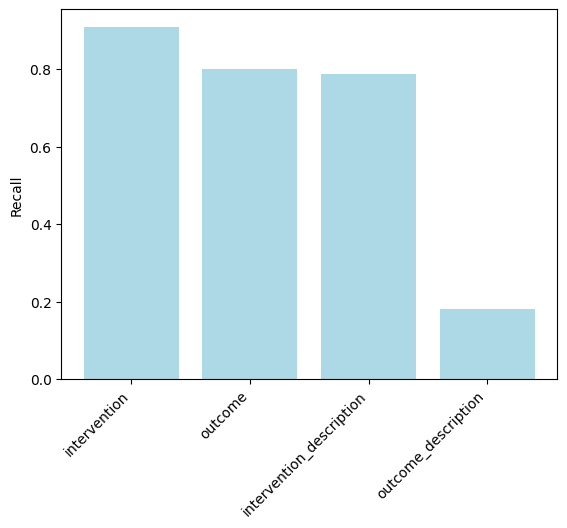

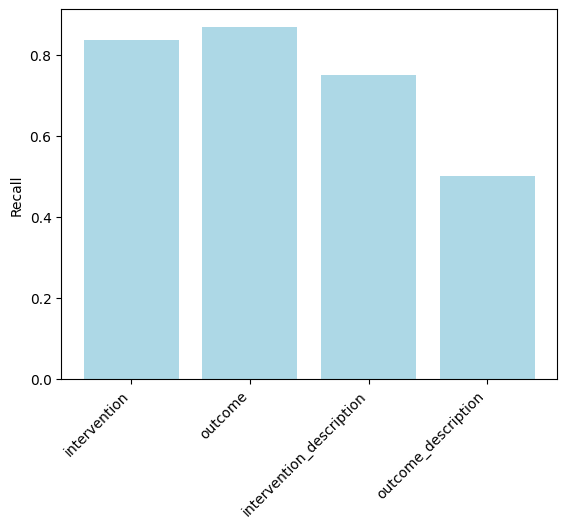

In [53]:
for b in batches:
    results = pd.read_csv('scores/evalio_all_GTE_{}.csv'.format(b))
    fields = results.columns.values[2:]
    heights = [results[f].mean() for f in fields]
    #plt.bar(fields, heights)
    plt.bar([f[4:] for f in fields], heights, color='lightblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Recall')
    plt.show()

# Effect size extraction

In [68]:
es_results = pd.concat([pd.read_csv('scores/FP_stats_prior_{}.csv'.format(b)) for b in batches], axis=0)

In [69]:
es_results

,Unnamed: 0,SR,Nb. Extractions,Cov. Articles,Cov. Effect Sizes
0,0,B152,80,0.50,0.00
1,1,B1027,31,0.88,0.88
2,2,B24,4,1.00,1.00
3,3,A2,42,0.71,0.71
4,4,A3,0,0.00,0.00
5,5,A1,30,1.00,1.00
6,6,B932,25,0.75,0.00
7,7,A4,23,0.89,0.00
8,8,B856,97,0.63,0.34
9,9,A5,21,0.61,0.61


['Unnamed: 0' 'SR' 'Nb. Extractions' 'Cov. Articles' 'Cov. Effect Sizes']


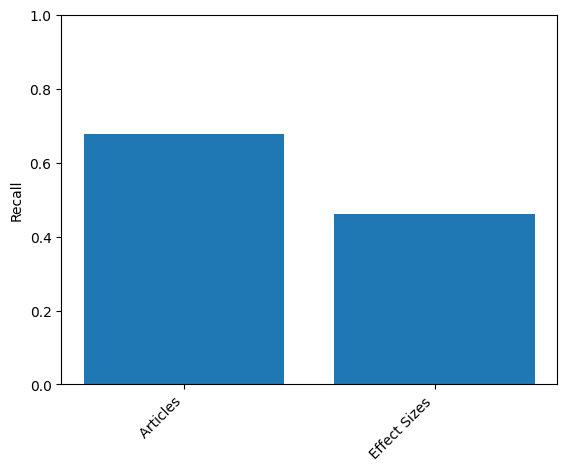

['Unnamed: 0' 'SR' 'Nb. Extractions' 'Cov. Articles' 'Cov. Effect Sizes']


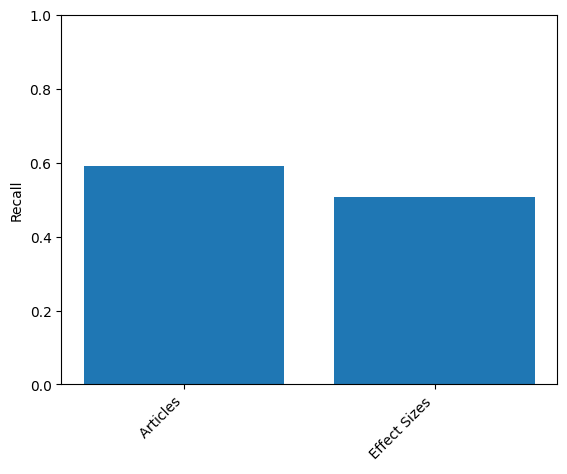

In [50]:
remove_outliers = False
for b in batches:
    results = pd.read_csv('scores/FP_stats_prior_{}.csv'.format(b))
    print(results.columns.values)
    if remove_outliers:
        results = results[results['Cov. Effect Sizes']!=0.0]
    fields = results.columns.values[3:]
    heights = [results[f].mean() for f in fields]
    #plt.bar(fields, heights)
    plt.bar([f[4:] for f in fields], heights, color='lightblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Recall')
    plt.ylim((0.0, 1.0))
    plt.show()

# Citations

In [71]:
citations_results = pd.concat([pd.read_csv('scores/Citations_prior_{}.csv'.format(b)) for b in batches], axis=0)

In [72]:
citations_results

,Unnamed: 0,SR,Precision,Recall
0,0,B152,0.010000,1.000000
1,1,B1027,0.150000,1.000000
2,2,B24,0.000000,0.000000
3,3,A2,0.040000,0.210000
4,4,A3,0.240000,0.570000
5,5,A1,0.010000,1.000000
6,6,B932,0.050000,1.000000
7,7,A4,0.200000,0.890000
8,8,B856,0.120000,0.960000
9,9,A5,0.170000,0.780000


['Unnamed: 0' 'SR' 'Precision' 'Recall']
['Unnamed: 0' 'SR' 'Precision' 'Recall']


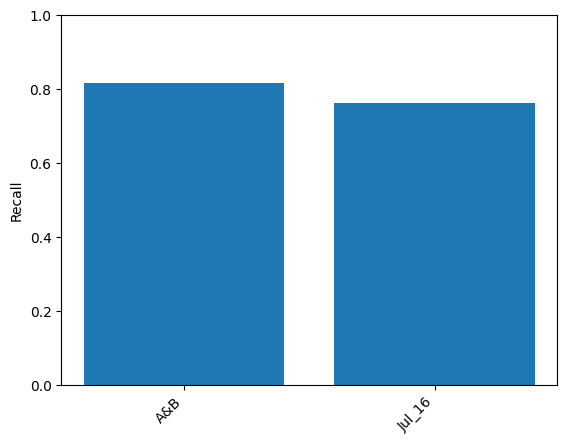

In [51]:
remove_outliers = True
heights = []
for b in batches:
    results = pd.read_csv('scores/Citations_prior_{}.csv'.format(b))
    print(results.columns.values)
    if remove_outliers:
        results = results[results['Recall']!=0.0]
    heights.append(results['Recall'].mean())
    #plt.bar(fields, heights)
plt.bar(batches, heights, color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Recall')
plt.ylim((0.0, 1.0))
plt.show()

# RCT

In [73]:
rct_results = pd.concat([pd.read_csv('scores/RCT_stats_prior_{}.csv'.format(b)) for b in batches], axis=0)

In [74]:
rct_results

,Unnamed: 0,SR,Precision,Recall
0,0,B24,0.000000,0.000000
1,1,A3,0.000000,0.000000
2,2,A5,0.130000,0.170000
3,3,B152,0.670000,1.000000
4,4,B69,0.530000,0.770000
5,5,B42,0.170000,1.000000
6,6,B1027,0.170000,0.620000
7,7,B932,0.440000,1.000000
8,8,B854,0.010000,0.140000
9,9,B920,0.570000,1.000000


# All results

In [155]:
fields = ['Intervention Name', 'Outcome Name', 'Intervention Description', 'Outcome Description', 'Citation', 'Identification Strategy (RCT or not)', 'Effect Size']

# IO Metrics

In [156]:
io_results

,Unnamed: 0,sr,sim_intervention,sim_outcome,sim_intervention_description,sim_outcome_description
0,0,A2,1.000000,1.000000,0.000000,0.0
1,1,A1,1.000000,1.000000,1.000000,0.0
2,2,B932,1.000000,1.000000,0.666667,1.0
3,3,A4,1.000000,1.000000,1.000000,0.0
4,4,B856,1.000000,1.000000,1.000000,0.0
5,5,A5,0.000000,0.000000,0.000000,0.0
6,6,B854,1.000000,1.000000,1.000000,0.0
7,7,B920,1.000000,0.000000,1.000000,0.0
8,8,B24,1.000000,1.000000,1.000000,0.0
9,9,B152,1.000000,1.000000,1.000000,1.0


In [157]:
n_studies_dict

{'B152': 60,
 'B1027': 144,
 'B24': 18,
 'A2': 234,
 'A3': 744,
 'A1': 52,
 'B932': 67,
 'A4': 233,
 'B856': 552,
 'A5': 322,
 'B42': 58,
 'B854': 130,
 'B69': 586,
 'B920': 82,
 '4_International Development': 93,
 '15_International Development': 1114,
 '5_International Development': 127,
 '9_International Development': 97,
 '10_International Development': 1126}

In [158]:
io_metrics = [0 for _ in range(4)]
total = 0
io_fields = io_results.columns.values[-4:]
for i, row in io_results[io_results['sim_intervention']!=0].iterrows():
    for j, f in enumerate(io_fields):
        io_metrics[j] += row[f]*n_studies_dict[row.sr]
    total += n_studies_dict[row.sr]
io_metrics = [m/total for m in io_metrics]

# Citations

In [159]:
citations_results

,Unnamed: 0,SR,Precision,Recall
0,0,B152,0.010000,1.000000
1,1,B1027,0.150000,1.000000
2,2,B24,0.000000,0.000000
3,3,A2,0.040000,0.210000
4,4,A3,0.240000,0.570000
5,5,A1,0.010000,1.000000
6,6,B932,0.050000,1.000000
7,7,A4,0.200000,0.890000
8,8,B856,0.120000,0.960000
9,9,A5,0.170000,0.780000


In [160]:
citations_metric = 0
total = 0

for i, row in citations_results[citations_results['Recall']!=0].iterrows():
    if row.SR!= 'TOTAL':
        citations_metric += row['Recall']*n_studies_dict[row.SR]
        total += n_studies_dict[row.SR]
citations_metric = citations_metric/total
citations_metric

0.6971039690902705

# RCTness

In [161]:
rct_results

,Unnamed: 0,SR,Precision,Recall
0,0,B24,0.000000,0.000000
1,1,A3,0.000000,0.000000
2,2,A5,0.130000,0.170000
3,3,B152,0.670000,1.000000
4,4,B69,0.530000,0.770000
5,5,B42,0.170000,1.000000
6,6,B1027,0.170000,0.620000
7,7,B932,0.440000,1.000000
8,8,B854,0.010000,0.140000
9,9,B920,0.570000,1.000000


In [162]:
rct_metric = 0
total = 0

for i, row in rct_results[rct_results['Recall']!=0].iterrows():
    if row.SR!= 'TOTAL':
        rct_metric += row['Recall']*n_studies_dict[row.SR]
        total += n_studies_dict[row.SR]
rct_metric = rct_metric/total
rct_metric

0.4473337670679659

# Effect Size

In [163]:
es_results

,Unnamed: 0,SR,Nb. Extractions,Cov. Articles,Cov. Effect Sizes
0,0,B152,80,0.50,0.00
1,1,B1027,31,0.88,0.88
2,2,B24,4,1.00,1.00
3,3,A2,42,0.71,0.71
4,4,A3,0,0.00,0.00
5,5,A1,30,1.00,1.00
6,6,B932,25,0.75,0.00
7,7,A4,23,0.89,0.00
8,8,B856,97,0.63,0.34
9,9,A5,21,0.61,0.61


In [164]:
es_metric = 0
total = 0

for i, row in es_results[es_results['Cov. Effect Sizes']!=0].iterrows():
    if row.SR!= 'TOTAL':
        es_metric += row['Cov. Effect Sizes']*n_studies_dict[row.SR]
        total += n_studies_dict[row.SR]
es_metric = es_metric/total
es_metric

0.6531452013923421

In [165]:
all_metrics

[0.7506395767616303,
 0.7636923560944326,
 0.6006764196948245,
 0.07479943369513922,
 0.6949072128851541,
 0.4473337670679659,
 0.6531452013923421]

# Plot

In [166]:
fields

['Intervention Name',
 'Outcome Name',
 'Intervention Description',
 'Outcome Description',
 'Citation',
 'Identification Strategy (RCT or not)',
 'Effect Size']

In [167]:
all_metrics = []
all_metrics += io_metrics
all_metrics.append(citations_metric)
all_metrics.append(rct_metric)
all_metrics.append(es_metric)

In [168]:
results = list(zip(fields, all_metrics))
results.sort(key=lambda x:x[1], reverse=True)
sorted_fields = [field for field, _ in results]
sorted_metrics = [metric for _, metric in results]

In [170]:
pd.DataFrame({'Field':sorted_fields, 'Value': sorted_metrics}).to_csv('extraction_plot_values.csv')

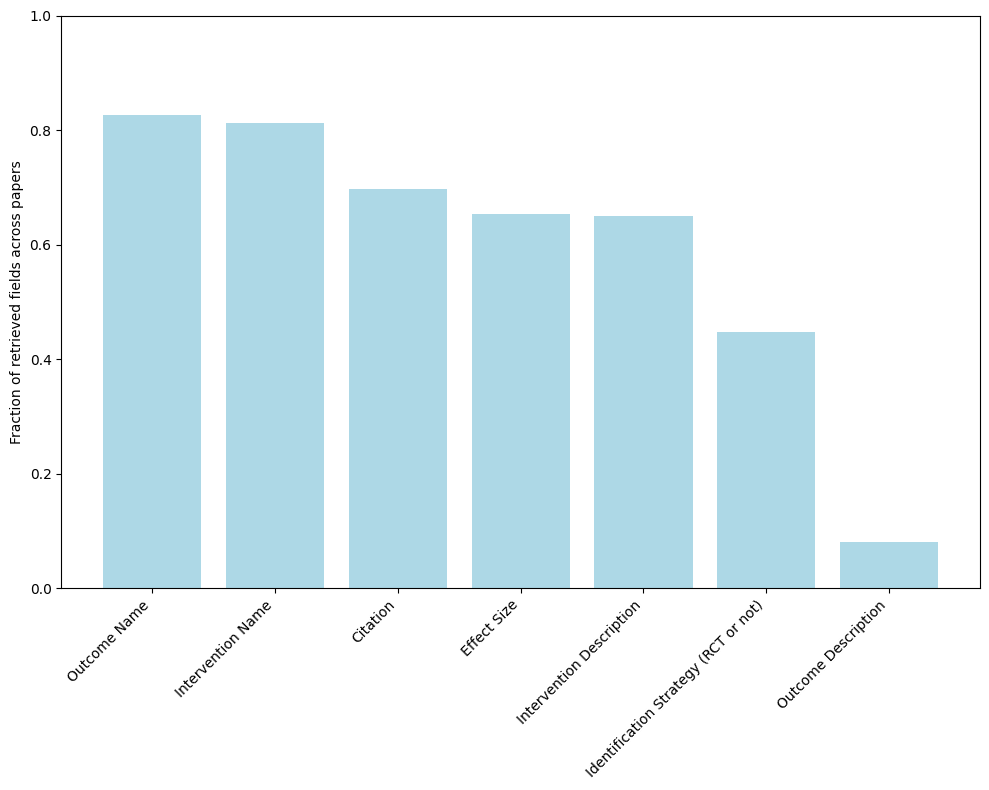

In [169]:
plt.figure(figsize=(10, 8))
bars = plt.bar(sorted_fields, sorted_metrics, color='lightblue')
plt.ylabel('Fraction of retrieved fields across papers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('plot_per_field_avg_across_papers.png')
plt.show()